In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc as misc 
import scipy.io as sio

from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set(font_scale=1.5)
# plt.style.use('dark_background')
plt.rcParams["font.family"] = "serif"

def eval_snr(x, x_est):
    if np.array_equal(x, x_est):
        return 0
    num = np.sqrt(np.sum(np.abs(x) ** 2))
    den = np.sqrt(np.sum(np.abs(x - x_est) ** 2))
    return round(20*np.log10(num/den), 2)


In [39]:
savefig_dir= '/Users/tliaudat/Documents/postdoc/github/large-scale-UQ/debug/matlab_output/M31_reg_strength_variations/figs/'

summary_mat_output = './../matlab_output/M31_reg_strength_variations/M31_LCI_str_reg_vars_n_tot_26.mat'
# matlab_output = './../matlab_output/Cai_results.mat'

summary_mat_output = sio.loadmat(summary_mat_output)
for key in summary_mat_output.keys():
    print(key)

__header__
__version__
__globals__
LCI_ana_mean_arr
LCI_syn_mean_arr
alpha
f_x_map_ana_arr
f_x_map_syn_arr
g_x_map_ana_arr
g_x_map_syn_arr
psnr_ana_vals
psnr_syn_vals
reg_param
snr_ana_vals
snr_syn_vals
tau_alpha
time_ana_vals
time_syn_vals


In [3]:
print(summary_mat_output['LCI_ana_mean_arr'].shape)

reg_param = summary_mat_output['reg_param'][0,:]


(26, 3)


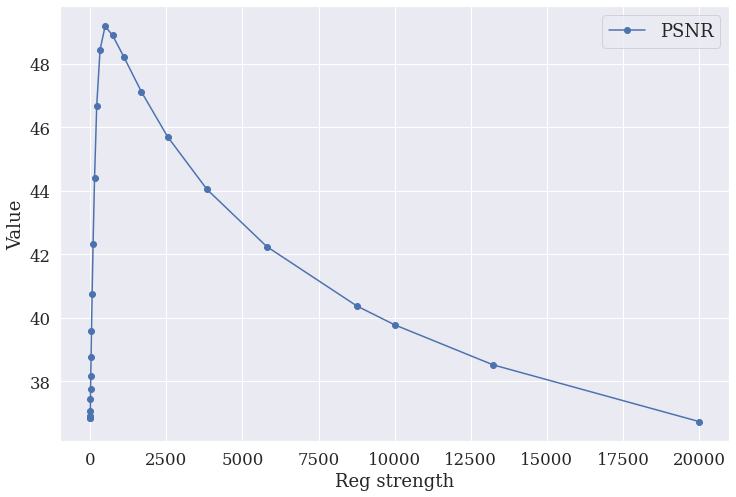

In [46]:
# summary_mat_output['psnr_ana_vals'][:,0].shape


plt.figure(figsize=(12,8))
plt.plot(reg_param, summary_mat_output['psnr_ana_vals'][:,0], '-o', label='PSNR')
plt.legend(fontsize=18)
plt.ylabel(r'Value')
plt.xlabel(r'Reg strength')
plt.show()


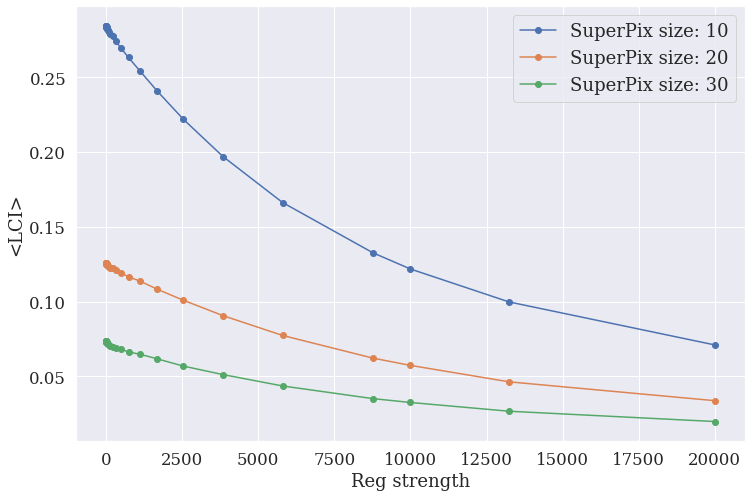

In [10]:
plt.figure(figsize=(12,8))
plt.plot(reg_param, summary_mat_output['LCI_ana_mean_arr'][:,0], '-o', label='SuperPix size: 10')
plt.plot(reg_param, summary_mat_output['LCI_ana_mean_arr'][:,1], '-o', label='SuperPix size: 20')
plt.plot(reg_param, summary_mat_output['LCI_ana_mean_arr'][:,2], '-o', label='SuperPix size: 30')
plt.legend(fontsize=18)
plt.ylabel(r'<LCI>')
plt.xlabel(r'Reg strength')
plt.show()


In [52]:
cmap(1)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

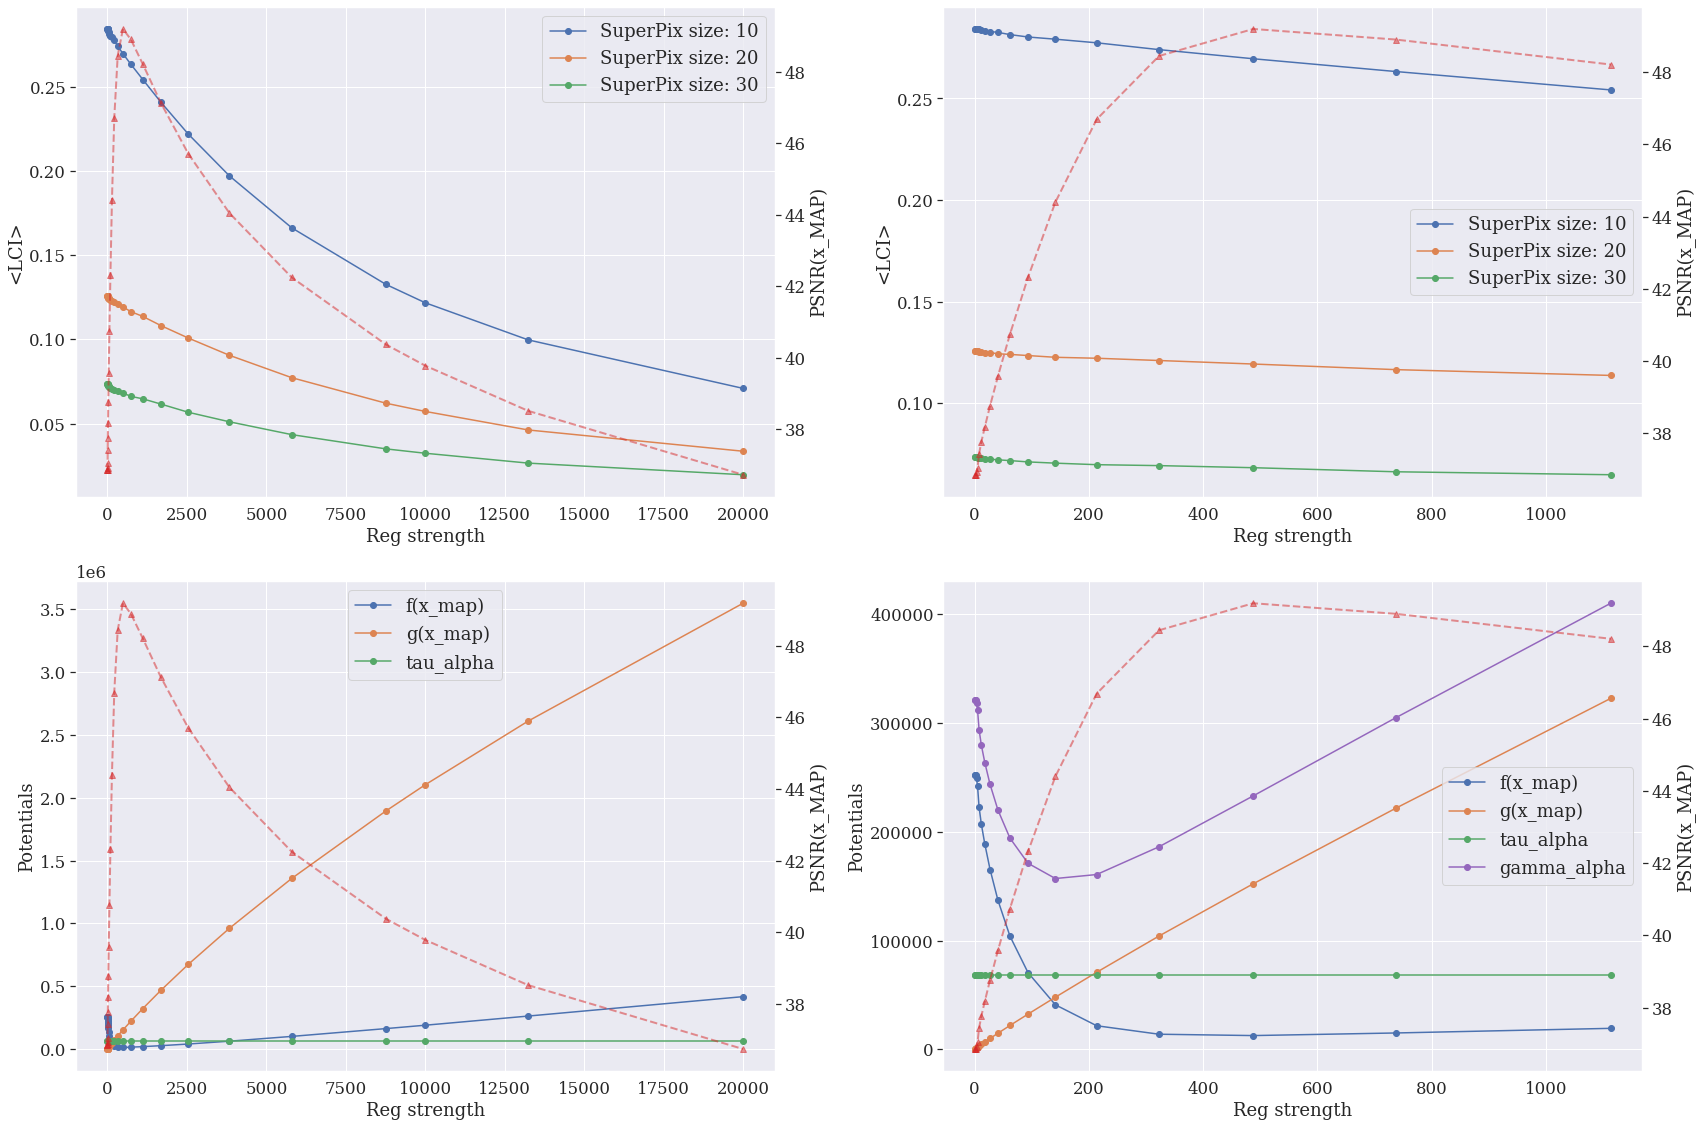

In [64]:
zoom_id = 18
kwargs = dict(linewidth=2, linestyle='dashed', markersize=6, marker='^', alpha=0.5)
def_cmap = plt.get_cmap("tab10")

fig, axs = plt.subplots(2,2, figsize=(24,16))

axs[0,0].plot(reg_param, summary_mat_output['LCI_ana_mean_arr'][:,0], '-o', label='SuperPix size: 10')
axs[0,0].plot(reg_param, summary_mat_output['LCI_ana_mean_arr'][:,1], '-o', label='SuperPix size: 20')
axs[0,0].plot(reg_param, summary_mat_output['LCI_ana_mean_arr'][:,2], '-o', label='SuperPix size: 30')
axs[0,0].legend(fontsize=18)
axs[0,0].set_ylabel(r'<LCI>')
axs[0,0].set_xlabel(r'Reg strength')

ax2 = axs[0,0].twinx()
ax2.plot(reg_param, summary_mat_output['psnr_ana_vals'][:,0], color=def_cmap(3), **kwargs)
ax2.set_ylabel(r'PSNR(x_MAP)')
ax2.grid(False)

# 
axs[1,0].plot(reg_param, summary_mat_output['f_x_map_ana_arr'][:,0], '-o', label='f(x_map)')
axs[1,0].plot(reg_param, summary_mat_output['g_x_map_ana_arr'][:,0], '-o', label='g(x_map)')
axs[1,0].plot(reg_param, np.ones(reg_param.shape) * summary_mat_output['tau_alpha'][0,0], '-o', label='tau_alpha')
axs[1,0].legend(fontsize=18, loc='upper center')
axs[1,0].set_ylabel(r'Potentials')
axs[1,0].set_xlabel(r'Reg strength')
ax2 = axs[1,0].twinx()
ax2.plot(reg_param, summary_mat_output['psnr_ana_vals'][:,0], color=def_cmap(3), **kwargs)
ax2.set_ylabel(r'PSNR(x_MAP)')
ax2.grid(False)

axs[0,1].plot(reg_param[:zoom_id], summary_mat_output['LCI_ana_mean_arr'][:zoom_id,0], '-o', label='SuperPix size: 10')
axs[0,1].plot(reg_param[:zoom_id], summary_mat_output['LCI_ana_mean_arr'][:zoom_id,1], '-o', label='SuperPix size: 20')
axs[0,1].plot(reg_param[:zoom_id], summary_mat_output['LCI_ana_mean_arr'][:zoom_id,2], '-o', label='SuperPix size: 30')
axs[0,1].legend(fontsize=18)
axs[0,1].set_ylabel(r'<LCI>')
axs[0,1].set_xlabel(r'Reg strength')
ax2 = axs[0,1].twinx()
ax2.plot(reg_param[:zoom_id], summary_mat_output['psnr_ana_vals'][:zoom_id,0], color=def_cmap(3), **kwargs)
ax2.set_ylabel(r'PSNR(x_MAP)')
ax2.grid(False)
# 
gamma_alpha = summary_mat_output['f_x_map_ana_arr'][:zoom_id,0] + summary_mat_output['g_x_map_ana_arr'][:zoom_id,0] + summary_mat_output['tau_alpha'][0,0]
axs[1,1].plot(reg_param[:zoom_id], summary_mat_output['f_x_map_ana_arr'][:zoom_id,0], '-o', label='f(x_map)')
axs[1,1].plot(reg_param[:zoom_id], summary_mat_output['g_x_map_ana_arr'][:zoom_id,0], '-o', label='g(x_map)')
axs[1,1].plot(reg_param[:zoom_id], np.ones(reg_param[:zoom_id].shape) * summary_mat_output['tau_alpha'][0,0], '-o', label='tau_alpha')
axs[1,1].plot(reg_param[:zoom_id], gamma_alpha, '-o', color=def_cmap(4), label='gamma_alpha')
axs[1,1].legend(fontsize=18, loc='center right')
axs[1,1].set_ylabel(r'Potentials')
axs[1,1].set_xlabel(r'Reg strength')
ax2 = axs[1,1].twinx()
ax2.plot(reg_param[:zoom_id], summary_mat_output['psnr_ana_vals'][:zoom_id,0], color=def_cmap(3), **kwargs)
ax2.set_ylabel(r'PSNR(x_MAP)')
ax2.grid(False)
plt.tight_layout()
plt.savefig(savefig_dir + 'LCI_reg_strength.pdf')
plt.show()





In [14]:
print(summary_mat_output['tau_alpha'])
print(summary_mat_output['f_x_map_ana_arr'][:,0])
print(summary_mat_output['g_x_map_ana_arr'][:,0])


[[67981.57752119]]
[252317.83995543 252232.53507651 252053.22473906 249016.32191437
 241990.67833084 222743.27430666 206905.24332827 188649.99826705
 165311.79445525 136898.74149314 104101.94066433  70537.10292518
  41040.5567889   21803.6184605   14012.46117382  12769.56859364
  15156.26294485  19415.16287995  26967.17102772  40115.39535456
  62752.09071542 100770.4146752  162904.10931655 189771.72057317
 262649.88431293 417200.03088366]
[4.24556608e+02 6.40929493e+02 9.66813827e+02 1.43714962e+03
 2.12936437e+03 3.12263060e+03 4.63294549e+03 6.86794443e+03
 1.01470513e+04 1.49605459e+04 2.20573618e+04 3.25139672e+04
 4.80245341e+04 7.09296933e+04 1.04235548e+05 1.52241101e+05
 2.21557638e+05 3.22547263e+05 4.67643838e+05 6.73522795e+05
 9.61472931e+05 1.35828935e+06 1.89515760e+06 2.10366466e+06
 2.61043168e+06 3.54828673e+06]


In [79]:
reg_param

print('{:08.2f}'.format(reg_param[2]))

00002.28


In [75]:
'bla {:.2f}'.format(22.2)

'bla 22.20'

In [68]:
LCI_res_path = '/Users/tliaudat/Documents/postdoc/github/large-scale-UQ/debug/matlab_output/M31_reg_strength_variations/LCI_results/M31_LCI_results_str_reg_00017.97.mat'

LCI_res_output = sio.loadmat(LCI_res_path)
for key in LCI_res_output.keys():
    try:
        print(key, '\t, shape: ', LCI_res_output[key].shape)
    except:
        print(key)

__header__
__version__
__globals__
LCI_10_ana_h_bound 	, shape:  (256, 256)
LCI_10_ana_l_bound 	, shape:  (256, 256)
LCI_10_ana_mean 	, shape:  (1, 1)
LCI_10_syn_h_bound 	, shape:  (256, 256)
LCI_10_syn_l_bound 	, shape:  (256, 256)
LCI_10_syn_mean 	, shape:  (1, 1)
LCI_20_ana_h_bound 	, shape:  (256, 256)
LCI_20_ana_l_bound 	, shape:  (256, 256)
LCI_20_ana_mean 	, shape:  (1, 1)
LCI_20_syn_h_bound 	, shape:  (256, 256)
LCI_20_syn_l_bound 	, shape:  (256, 256)
LCI_20_syn_mean 	, shape:  (1, 1)
LCI_30_ana_h_bound 	, shape:  (256, 256)
LCI_30_ana_l_bound 	, shape:  (256, 256)
LCI_30_ana_mean 	, shape:  (1, 1)
LCI_30_syn_h_bound 	, shape:  (256, 256)
LCI_30_syn_l_bound 	, shape:  (256, 256)
LCI_30_syn_mean 	, shape:  (1, 1)
alpha 	, shape:  (1, 1)
current_reg_param 	, shape:  (1, 1)
delta 	, shape:  (1, 1)
dirty_im 	, shape:  (256, 256)
f_x_map_ana 	, shape:  (1, 1)
f_x_map_syn 	, shape:  (1, 1)
g_x_map_ana 	, shape:  (1, 1)
g_x_map_syn 	, shape:  (1, 1)
gridSize 	, shape:  (1, 3)
im 	, s

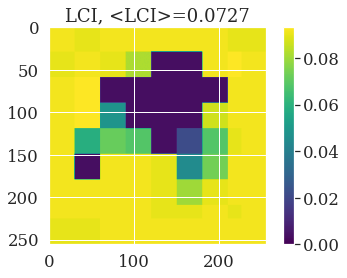

In [85]:
LCI_10 = LCI_res_output['LCI_30_ana_h_bound'] - LCI_res_output['LCI_30_ana_l_bound']

plt.figure()
plt.imshow(LCI_10, cmap='viridis', vmin=0.)
plt.colorbar()
plt.title('LCI, <LCI>={:.4f}'.format(np.mean(LCI_10)))
plt.show()